# Assignment 5

This is an basecode for assignment 5 of Artificial Intelligence class (CSCE-4613), Spring 2025

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms

from PIL import Image
import pickle
import matplotlib.pyplot as plt

## Question 1
### Define Input Transformation

In [3]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
IMAGE_SIZE = 224
image_transforms = transforms.Compose([
                           transforms.Resize(IMAGE_SIZE),
                           transforms.CenterCrop(IMAGE_SIZE),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = MEAN, std = STD)])

index2name = pickle.load(open("imagenet_class_names.pkl", "rb"))
print(index2name)


{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

### Define Model

In [4]:
model = torchvision.models.densenet121(pretrained=True)  # Modified Line for Q1 d and e
softmax_layer = nn.Softmax(dim=1)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 151MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Classify and Visualize Image

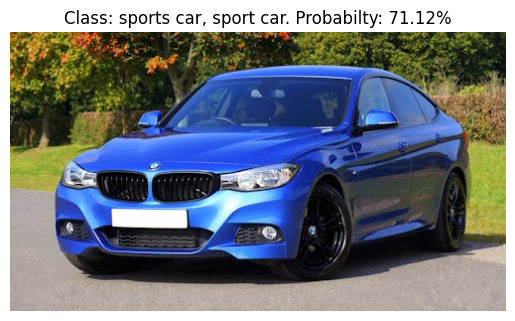

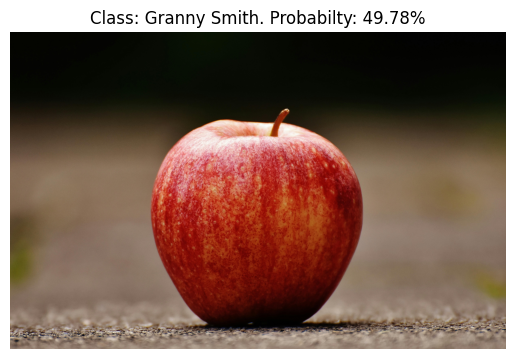

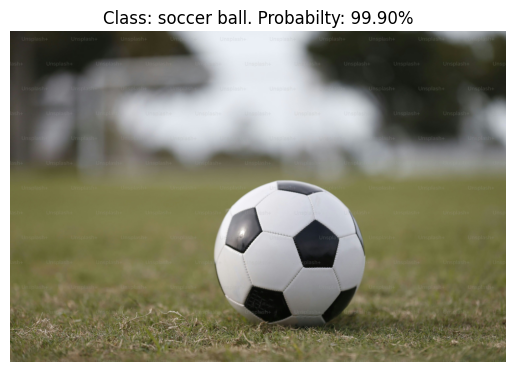

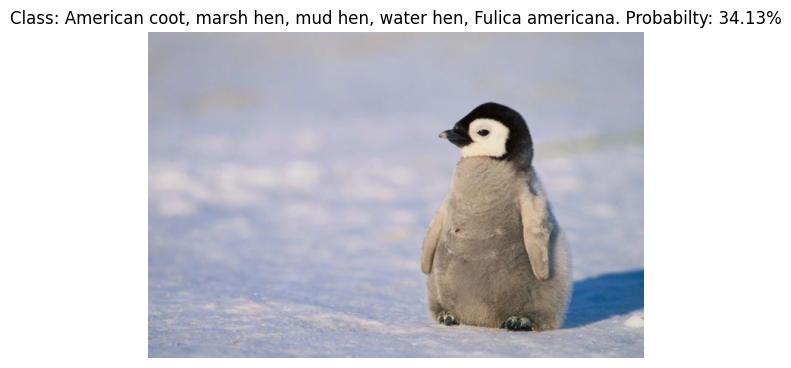

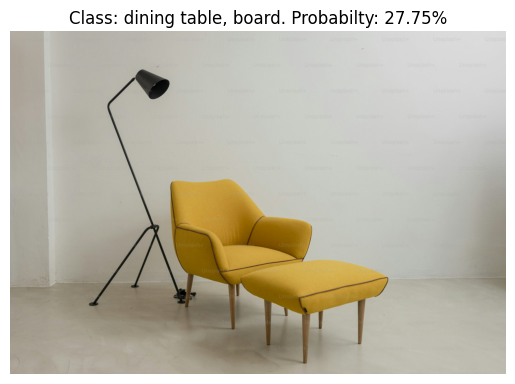

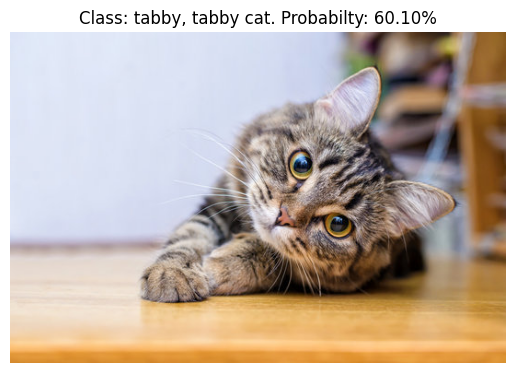

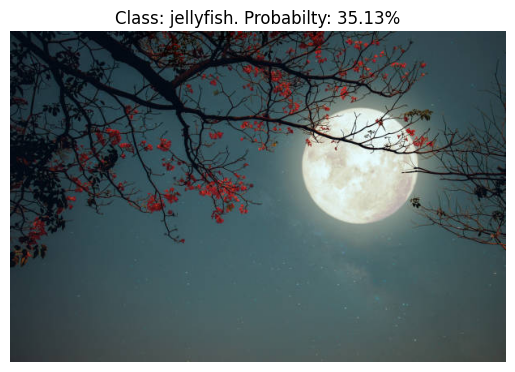

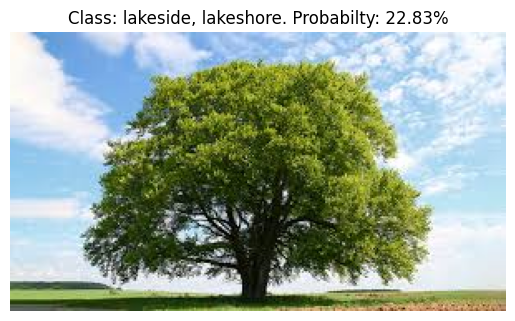

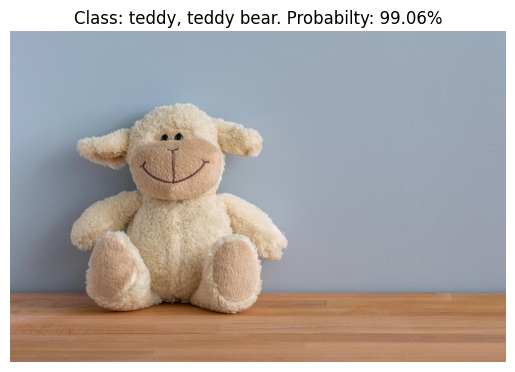

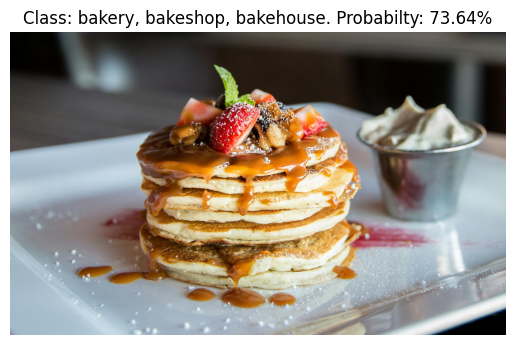

In [ ]:
import os
# Set your folder path here
folder_path = "Sample_Images"  # change this to your actual folder path
image_extensions = [".jpg", ".jpeg"]

# Loop through all image files in the folder
for filename in os.listdir(folder_path):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_path = os.path.join(folder_path, filename)

        original_image = Image.open(image_path).convert("RGB")
        image = image_transforms(original_image)
        image = image.unsqueeze(0)
        output = softmax_layer(model(image))

        prediction = torch.argmax(output, dim=1).item()
        prob = output[0, prediction].item() * 100
        predicted_name = index2name[prediction]

        plt.imshow(original_image)
        plt.title("Class: %s. Probabilty: %.2f" % (predicted_name, prob) + "%")
        plt.axis("off")
        plt.show()

### Get Top-K Predictions

In [ ]:
K = 5
tio_k_values, tio_k_indices = torch.topk(output, K)
tio_k_values = tio_k_values.squeeze().detach().numpy()
tio_k_indices = tio_k_indices.squeeze().detach().numpy()
for score, index in zip(tio_k_values, tio_k_indices):
  print("Class: %s. Probabilty: %.2f" % (index2name[index], score.item() * 100) + "%")

Class: bakery, bakeshop, bakehouse. Probabilty: 73.64%
Class: ice cream, icecream. Probabilty: 13.96%
Class: plate. Probabilty: 4.01%
Class: trifle. Probabilty: 3.33%
Class: chocolate sauce, chocolate syrup. Probabilty: 2.12%


In [ ]:
# Parameters
folder_path = "Sample_Images"  # Change to your folder path
image_extensions = [".jpg", ".jpeg", ".png"]
K = 5  # Top K predictions

# Loop through images in folder
for filename in os.listdir(folder_path):
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        image_path = os.path.join(folder_path, filename)

        # Load and preprocess image
        original_image = Image.open(image_path).convert("RGB")
        image = image_transforms(original_image)
        image = image.unsqueeze(0)
        output = softmax_layer(model(image))

        # Top-K predictions
        top_k_values, top_k_indices = torch.topk(output, K)
        top_k_values = top_k_values.squeeze().detach().numpy()
        top_k_indices = top_k_indices.squeeze().detach().numpy()

        # Print top K results
        print(f"\nTop-{K} predictions for: {filename}")
        for score, index in zip(top_k_values, top_k_indices):
            print("Class: %s. Probability: %.2f%%" % (index2name[index], score * 100))


Top-5 predictions for: test9.jpeg
Class: sports car, sport car. Probability: 71.12%
Class: convertible. Probability: 7.54%
Class: racer, race car, racing car. Probability: 6.11%
Class: beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon. Probability: 6.07%
Class: grille, radiator grille. Probability: 3.87%

Top-5 predictions for: test2.jpg
Class: Granny Smith. Probability: 49.78%
Class: pomegranate. Probability: 16.42%
Class: orange. Probability: 4.54%
Class: fig. Probability: 2.73%
Class: jack-o'-lantern. Probability: 2.28%

Top-5 predictions for: test4.jpg
Class: soccer ball. Probability: 99.90%
Class: golf ball. Probability: 0.04%
Class: rugby ball. Probability: 0.01%
Class: croquet ball. Probability: 0.01%
Class: Sealyham terrier, Sealyham. Probability: 0.01%

Top-5 predictions for: test1.jpeg
Class: American coot, marsh hen, mud hen, water hen, Fulica americana. Probability: 34.13%
Class: king penguin, Aptenodytes patagonica. Probability: 16.09%
Cl

## Question 2

### Define Training Data Loader

In [5]:
train_batch_size = 32
train_dataset = torchvision.datasets.CIFAR10(root="data/", transform=torchvision.transforms.ToTensor(), train=True, download=True) # Define Training Set of CIFAR-10
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=train_batch_size, shuffle=True) # Define Training Loader of CIFAR-10

100%|██████████| 170M/170M [00:05<00:00, 30.3MB/s]


### Define Model and Training Framework

In [11]:
class ClassificationModel(torch.nn.Module):
  def __init__(self):
    super(ClassificationModel, self).__init__()
    self.num_classes = 10
    self.linear1 = nn.Linear(3 * 32 * 32, 1024)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(1024, 512)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(512, self.num_classes)

  def forward(self, x):
    n, c, h, w = x.size()
    x = x.reshape(n, -1)
    x = self.relu1(self.linear1(x))
    x = self.relu2(self.linear2(x))
    x = self.linear3(x)
    return x

Epoch [1/3]. Iter [1/1563]. Loss: 2.3055. Accuracy: 0.09
Epoch [1/3]. Iter [201/1563]. Loss: 2.1476. Accuracy: 0.19
Epoch [1/3]. Iter [401/1563]. Loss: 1.9833. Accuracy: 0.12
Epoch [1/3]. Iter [601/1563]. Loss: 1.5496. Accuracy: 0.44
Epoch [1/3]. Iter [801/1563]. Loss: 1.6534. Accuracy: 0.44
Epoch [1/3]. Iter [1001/1563]. Loss: 1.9051. Accuracy: 0.25
Epoch [1/3]. Iter [1201/1563]. Loss: 1.8430. Accuracy: 0.34
Epoch [1/3]. Iter [1401/1563]. Loss: 1.7774. Accuracy: 0.34
Epoch [2/3]. Iter [1/1563]. Loss: 1.8664. Accuracy: 0.34
Epoch [2/3]. Iter [201/1563]. Loss: 2.0579. Accuracy: 0.31
Epoch [2/3]. Iter [401/1563]. Loss: 1.8935. Accuracy: 0.38
Epoch [2/3]. Iter [601/1563]. Loss: 1.8629. Accuracy: 0.44
Epoch [2/3]. Iter [801/1563]. Loss: 1.8904. Accuracy: 0.28
Epoch [2/3]. Iter [1001/1563]. Loss: 1.5371. Accuracy: 0.41
Epoch [2/3]. Iter [1201/1563]. Loss: 1.7089. Accuracy: 0.47
Epoch [2/3]. Iter [1401/1563]. Loss: 1.7220. Accuracy: 0.38
Epoch [3/3]. Iter [1/1563]. Loss: 1.8150. Accuracy: 0.

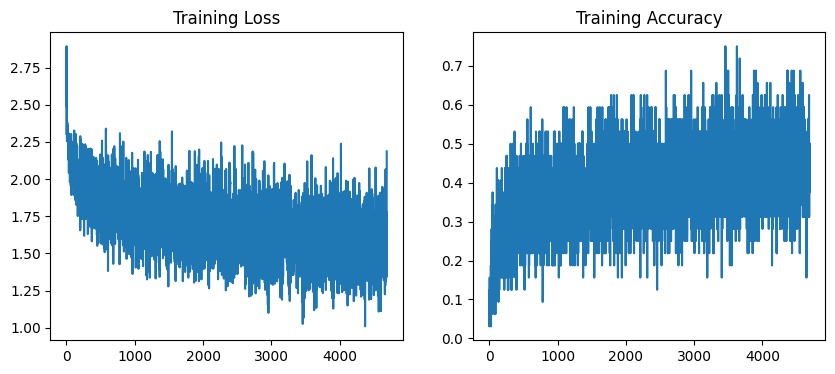

In [12]:
cuda = torch.cuda.is_available()
model = ClassificationModel()
if cuda:
  model.cuda()

model.train()
learning_rate = 0.001
num_epochs = 3
optim = torch.optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()
loss_logger = []
accuracy_logger = []

for epoch in range(1, num_epochs + 1):
  for it, (images, labels) in enumerate(train_loader):
      if cuda:
        images = images.cuda()
        labels = labels.cuda()

      # Write your code to computer outputs, loss, accuracy, and optimize model
      outputs = model(images)
      loss = loss_fn(outputs, labels)
      accuracy = (torch.argmax(outputs, dim=1) == labels).float().mean()
      optim.zero_grad()
      loss.backward()
      optim.step()

      loss_logger.append(loss.item())
      accuracy_logger.append(accuracy.item())

      if it % 200 == 0:
        print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.4f. Accuracy: %.2f" % (epoch, num_epochs, it + 1, len(train_loader), loss, accuracy))

torch.save(model.state_dict(), "CIFAR10-Model.pth")

# Write your code to visualize the training losses over interations
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(loss_logger)
plt.title("Training Loss")
# Write your code to visualize the training accuracies over interations
plt.subplot(1,2,2)
plt.plot(accuracy_logger)
plt.title("Training Accuracy")
plt.show()

### Load Model and Evaluate Model On Testing Dataset

Iter [1/1563]. Accuracy: 0.34
Iter [501/1563]. Accuracy: 0.50
Iter [1001/1563]. Accuracy: 0.50
Iter [1501/1563]. Accuracy: 0.31
Final Accuracy: 44.61%
Top 5 Accuracy: 90.81%


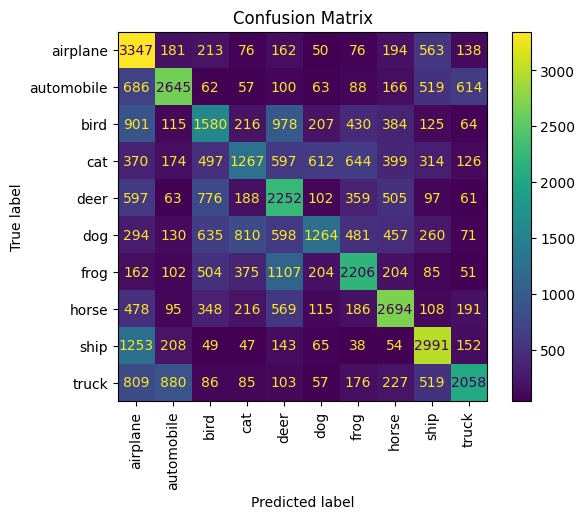

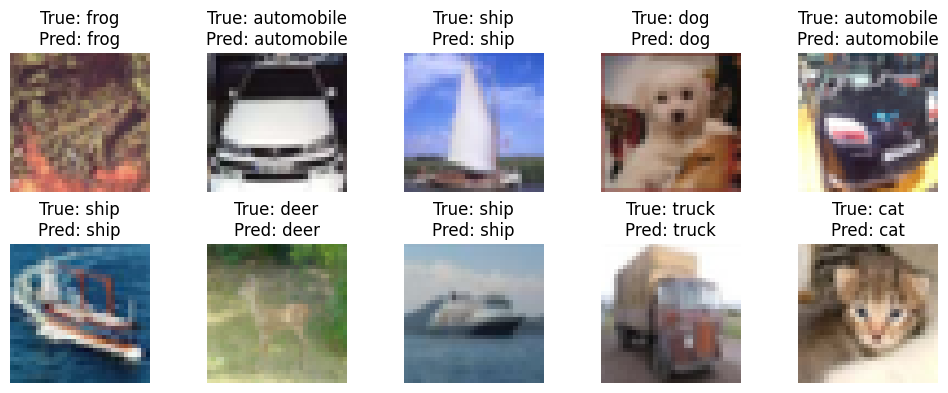

In [16]:
cuda = torch.cuda.is_available()
model = ClassificationModel()
if cuda:
  model.cuda()

# Load your trained model in the previous step
model.load_state_dict(torch.load("/content/CIFAR10-Model.pth"))
model.eval()

test_dataset = torchvision.datasets.CIFAR10(root="data/", transform=torchvision.transforms.ToTensor(), train=True, download=True) # Define Training Set of CIFAR-10
test_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=train_batch_size, shuffle=True) # Define Training Loader of CIFAR-10

final_accuracy = 0.0
final_top_5_accuracy = 0.0
total_samples = 0

y_preds = []
y_labels = []

correct_images = []
correct_labels = []
correct_preds = []

for it, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()

    # Write your code to computer outputs, accuracy, and top 5 accuracy
    outputs = model(images)
    _, top5_indices = torch.topk(outputs, 5, dim=1)

    top1_preds = torch.argmax(outputs, dim=1)
    acc = (top1_preds == labels).float().mean().item()
    top5_acc = top5_indices.eq(labels.view(-1, 1)).any(dim=1).float().mean().item()

    final_accuracy += acc
    final_top_5_accuracy += top5_acc

    y_preds.extend(top1_preds.cpu().tolist())
    y_labels.extend(labels.cpu().tolist())

    # Collect correct predictions
    for i in range(images.size(0)):
        if top1_preds[i] == labels[i] and len(correct_images) < 10:
            correct_images.append(images[i].cpu())
            correct_labels.append(labels[i].cpu().item())
            correct_preds.append(top1_preds[i].cpu().item())

    if it % 500 == 0:
        print("Iter [%d/%d]. Accuracy: %.2f" % (it + 1, len(test_loader), acc))

# Print final metrics
print("Final Accuracy: %.2f%%" % (100 * final_accuracy / len(test_loader)))
print("Top 5 Accuracy: %.2f%%" % (100 * final_top_5_accuracy / len(test_loader)))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Write your code to visualize the confusion matrix
cm = confusion_matrix(y_labels, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
disp.plot(xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Write your code to visualize the correct predictions
plt.figure(figsize=(10, 4))
for i in range(len(correct_images)):
    img = correct_images[i]
    img = img.permute(1, 2, 0).numpy()  # Convert to HWC
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {test_dataset.classes[correct_labels[i]]}\nPred: {test_dataset.classes[correct_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()